In [1]:
import sys
sys.path.insert(0,'..')

from nets.core import train_model, prune_neurons, grow_neurons, get_layer_sizes, initialize_parameters, get_param_string, train_dynamic_model, measure_accuracy
from nets.datasets import mnist_3, fashion_mnist_tshirt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

# Load the data

In [2]:
X_train_m, X_test_m, y_train_m, y_test_m = mnist_3()
X_train_m.shape, y_train_m.shape, X_test_m.shape, y_test_m.shape

((784, 48000), (1, 48000), (784, 12000), (1, 12000))

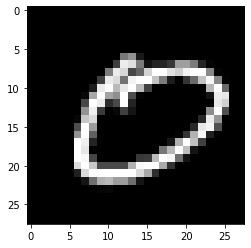

In [3]:
pixels = X_train_m[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = fashion_mnist_tshirt()
X_train_fm.shape, y_train_fm.shape, X_test_fm.shape, y_test_fm.shape

((784, 48000), (1, 48000), (784, 12000), (1, 12000))

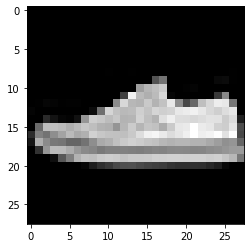

In [5]:
pixels = X_train_fm[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Test pruning neurons

In [7]:
layers_dims = [784, 20, 20, 1]

In [13]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.05, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.359812
Cost after epoch 1: 0.214252
Cost after epoch 2: 0.156755
Cost after epoch 3: 0.126837
Cost after epoch 4: 0.119046
Cost after epoch 5: 0.112092
Cost after epoch 6: 0.110529
Cost after epoch 7: 0.105766
Cost after epoch 8: 0.101518
Cost after epoch 9: 0.096901
Cost after epoch 10: 0.092610
Cost after epoch 11: 0.088425
Cost after epoch 12: 0.087657
Cost after epoch 13: 0.084147
Cost after epoch 14: 0.080914
Cost after epoch 15: 0.081007
Cost after epoch 16: 0.076784
Cost after epoch 17: 0.075424
Cost after epoch 18: 0.081668
Cost after epoch 19: 0.077549


In [15]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.9865416666666667

In [17]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.05, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.297169
Cost after epoch 1: 0.154100
Cost after epoch 2: 0.120355
Cost after epoch 3: 0.104911
Cost after epoch 4: 0.101299
Cost after epoch 5: 0.087843
Cost after epoch 6: 0.090634
Cost after epoch 7: 0.092526
Cost after epoch 8: 0.079348
Cost after epoch 9: 0.080150
Cost after epoch 10: 0.080602
Cost after epoch 11: 0.077172
Cost after epoch 12: 0.076063
Cost after epoch 13: 0.072677
Cost after epoch 14: 0.063783
Cost after epoch 15: 0.061885
Cost after epoch 16: 0.061831
Cost after epoch 17: 0.062763
Cost after epoch 18: 0.061132
Cost after epoch 19: 0.060422


In [20]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.9818333333333333

In [19]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 2, 5, 1]

In [21]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.9818333333333333

In [22]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.317890
Cost after epoch 1: 0.180584
Cost after epoch 2: 0.122194
Cost after epoch 3: 0.093648
Cost after epoch 4: 0.075114
Cost after epoch 5: 0.064961
Cost after epoch 6: 0.059103
Cost after epoch 7: 0.052779
Cost after epoch 8: 0.049598
Cost after epoch 9: 0.047101
Cost after epoch 10: 0.043771
Cost after epoch 11: 0.042957
Cost after epoch 12: 0.041046
Cost after epoch 13: 0.040205
Cost after epoch 14: 0.040432
Cost after epoch 15: 0.040886
Cost after epoch 16: 0.040099
Cost after epoch 17: 0.036542
Cost after epoch 18: 0.036072
Cost after epoch 19: 0.034638


In [23]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.988625

In [24]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 7, 8, 1]

In [25]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.988625

In [26]:
layers_dims = [784, 100, 100, 1]

In [27]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_m, y_train_m, parameters, learning_rate=0.05, l1_term=0.01, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 0.782117
Cost after epoch 1: 0.396082
Cost after epoch 2: 0.310997
Cost after epoch 3: 0.277403
Cost after epoch 4: 0.261473
Cost after epoch 5: 0.247344
Cost after epoch 6: 0.234010
Cost after epoch 7: 0.230796
Cost after epoch 8: 0.231137
Cost after epoch 9: 0.232779
Cost after epoch 10: 0.229599
Cost after epoch 11: 0.228239
Cost after epoch 12: 0.221841
Cost after epoch 13: 0.218048
Cost after epoch 14: 0.215499
Cost after epoch 15: 0.216250
Cost after epoch 16: 0.218483
Cost after epoch 17: 0.217932
Cost after epoch 18: 0.213969
Cost after epoch 19: 0.214877


In [28]:
measure_accuracy(parameters_scaled, X_train_m, y_train_m)

0.9879375

In [34]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 5, 7, 1]

In [37]:
print(get_param_string(parameters_pruned['W1']))
print(get_param_string(parameters_pruned['W2']))

11111
0121011


In [35]:
measure_accuracy(parameters_pruned, X_train_m, y_train_m)

0.9878958333333333

# Test growing neurons

In [36]:
parameters_grown = copy.deepcopy(parameters_pruned)
grow_neurons(parameters_grown)
get_layer_sizes(parameters_grown)

[784, 10, 12, 1]

In [38]:
print(get_param_string(parameters_grown['W1']))
print(get_param_string(parameters_grown['W2']))

1111122222
011101112212


In [39]:
parameters_grown['W1'].shape

(10, 784)

In [40]:
parameters_grown['W2'].shape

(12, 10)

In [54]:
layers_dims = [784, 10, 10, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_m, y_train_m, parameters, learning_rate=0.01, l1_term=0.002, n_iterations=5)

After growing: [784, 15, 15, 1]
111111111133333
110110110033333
Cost after epoch 0: 0.152068
Cost after epoch 1: 0.101780
Cost after epoch 2: 0.086675
Cost after epoch 3: 0.078669
Cost after epoch 4: 0.073484
Iteration 1: accuracy 0.9774791666666667
After pruning: [784, 15, 15, 1]
Accuracy 0.9774791666666667
111111111122222
110110110022222
-------------------
After growing: [784, 20, 20, 1]
11111111112222233333
11011011001111133333
Cost after epoch 0: 0.074828
Cost after epoch 1: 0.071787
Cost after epoch 2: 0.069272
Cost after epoch 3: 0.067022
Cost after epoch 4: 0.064941
Iteration 2: accuracy 0.9826875
After pruning: [784, 15, 16, 1]
Accuracy 0.9826875
111111111122222
1101101100222233
-------------------
After growing: [784, 20, 21, 1]
11111111112222233333
110110110011111133333
Cost after epoch 0: 0.063942
Cost after epoch 1: 0.062330
Cost after epoch 2: 0.060768
Cost after epoch 3: 0.059234
Cost after epoch 4: 0.057587
Iteration 3: accuracy 0.9858125
After pruning: [784, 15, 16, 1]

In [55]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.989125

In [56]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_m, y_train_m, parameters, learning_rate=0.01, l1_term=0.002, n_iterations=5)

After growing: [784, 8, 8, 1]
11133333
01033233
Cost after epoch 0: 0.114036
Cost after epoch 1: 0.087633
Cost after epoch 2: 0.070972
Cost after epoch 3: 0.055175
Cost after epoch 4: 0.042520
Iteration 1: accuracy 0.9767916666666666
After pruning: [784, 8, 8, 1]
Accuracy 0.9767916666666666
11112222
01011212
-------------------
After growing: [784, 13, 13, 1]
1111222233333
0101111133233
Cost after epoch 0: 0.036444
Cost after epoch 1: 0.033487
Cost after epoch 2: 0.031706
Cost after epoch 3: 0.030753
Cost after epoch 4: 0.030708
Iteration 2: accuracy 0.9800625
After pruning: [784, 12, 11, 1]
Accuracy 0.9800625
111122222432
01011111232
-------------------
After growing: [784, 17, 16, 1]
11112222243233333
0101111111123333
Cost after epoch 0: 0.033145
Cost after epoch 1: 0.033334
Cost after epoch 2: 0.031064
Cost after epoch 3: 0.029907
Cost after epoch 4: 0.028567
Iteration 3: accuracy 0.9826666666666667
After pruning: [784, 12, 12, 1]
Accuracy 0.9826666666666667
111122222322
01011111111

In [57]:
measure_accuracy(parameters, X_train_m, y_train_m)

0.9883958333333334

# Fashion MNIST

In [58]:
layers_dims = [784, 100, 100, 1]

In [65]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, self_scale=True, num_epochs=20, print_cost=True)

Cost after epoch 0: 3.471439
Cost after epoch 1: 1.922243
Cost after epoch 2: 1.201067
Cost after epoch 3: 0.824852
Cost after epoch 4: 0.598112
Cost after epoch 5: 0.455540
Cost after epoch 6: 0.358875
Cost after epoch 7: 0.291958
Cost after epoch 8: 0.246167
Cost after epoch 9: 0.212625
Cost after epoch 10: 0.186393
Cost after epoch 11: 0.164651
Cost after epoch 12: 0.150406
Cost after epoch 13: 0.137818
Cost after epoch 14: 0.127331
Cost after epoch 15: 0.119736
Cost after epoch 16: 0.111852
Cost after epoch 17: 0.106494
Cost after epoch 18: 0.100673
Cost after epoch 19: 0.096830


In [66]:
measure_accuracy(parameters_scaled, X_train_fm, y_train_fm)

0.9618125

In [67]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_neurons(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 22, 43, 1]

In [69]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 8, 8, 1]
11133333
01033233
Cost after epoch 0: 0.064613
Cost after epoch 1: 0.058200
Cost after epoch 2: 0.064434
Cost after epoch 3: 0.064971
Cost after epoch 4: 0.063740
Iteration 1: accuracy 0.9601041666666666
After pruning: [784, 7, 8, 1]
Accuracy 0.9601041666666666
1111222
01022215
-------------------
After growing: [784, 12, 13, 1]
111122233333
0101111133233
Cost after epoch 0: 0.061949
Cost after epoch 1: 0.058552
Cost after epoch 2: 0.059104
Cost after epoch 3: 0.060814
Cost after epoch 4: 0.058835
Iteration 2: accuracy 0.9611666666666666
After pruning: [784, 9, 9, 1]
Accuracy 0.9611875
111121232
010111112
-------------------
After growing: [784, 14, 14, 1]
11112123233333
01011111132333
Cost after epoch 0: 0.061744
Cost after epoch 1: 0.059893
Cost after epoch 2: 0.047801
Cost after epoch 3: 0.058577
Cost after epoch 4: 0.057644
Iteration 3: accuracy 0.963
After pruning: [784, 8, 9, 1]
Accuracy 0.963
11112122
010111112
-------------------
After growing: [78

In [70]:
layers_dims = [784, 100, 100, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 110, 110, 1]
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
Cost after epoch 0: 3.601171
Cost after epoch 1: 2.016749
Cost after epoch 2: 1.269526
Cost after epoch 3: 0.874773
Cost after epoch 4: 0.635476
Iteration 1: accuracy 0.9545833333333333
After pruning: [784, 76, 100, 1]
Accuracy 0.9546875
1111111111111111111111111211112222211222222222122222222222222222223233333232
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121221111121
-------------------
After growing: [784, 83, 110, 1]
11111111111111111111111112111122222112222222221222222222222222222232333332323333333
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111113333333333
Cost after epoch 0: 0.497077
Cost after epoch 1: 0.393175
Cost after epoch 2: 0.

In [71]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=10)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.066023
Cost after epoch 1: 0.060020
Cost after epoch 2: 0.050706
Cost after epoch 3: 0.056405
Cost after epoch 4: 0.057278
Iteration 1: accuracy 0.9592291666666667
After pruning: [784, 8, 8, 1]
Accuracy 0.9592291666666667
11112222
01011212
-------------------
After growing: [784, 13, 13, 1]
1111222255555
0101111155455
Cost after epoch 0: 0.053881
Cost after epoch 1: 0.056833
Cost after epoch 2: 0.060530
Cost after epoch 3: 0.062232
Cost after epoch 4: 0.061549
Iteration 2: accuracy 0.9612083333333333
After pruning: [784, 9, 10, 1]
Accuracy 0.9612083333333333
111122221
0101121122
-------------------
After growing: [784, 14, 15, 1]
11112222155555
010111111154555
Cost after epoch 0: 0.061748
Cost after epoch 1: 0.064419
Cost after epoch 2: 0.061927
Cost after epoch 3: 0.063600
Cost after epoch 4: 0.062343
Iteration 3: accuracy 0.9642916666666667
After pruning: [784, 9, 12, 1]
Accuracy 0.9642708333333333
111122221
010112

In [72]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.002, n_iterations=5)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.066023
Cost after epoch 1: 0.060020
Iteration 1: accuracy 0.9557083333333334
After pruning: [784, 8, 8, 1]
Accuracy 0.9557083333333334
11122222
01022213
-------------------
After growing: [784, 13, 13, 1]
1112222255555
0101111155455
Cost after epoch 0: 0.053017
Cost after epoch 1: 0.056349
Iteration 2: accuracy 0.9573125
After pruning: [784, 10, 10, 1]
Accuracy 0.9573541666666666
1111222222
0101111122
-------------------
After growing: [784, 15, 15, 1]
111122222255555
010111111154555
Cost after epoch 0: 0.058499
Cost after epoch 1: 0.059999
Iteration 3: accuracy 0.95875
After pruning: [784, 11, 10, 1]
Accuracy 0.95875
11112222223
0101111111
-------------------
After growing: [784, 16, 15, 1]
1111222222355555
010111111154554
Cost after epoch 0: 0.062419
Cost after epoch 1: 0.062080
Iteration 4: accuracy 0.9600625
After pruning: [784, 11, 10, 1]
Accuracy 0.9600625
11112222223
0101111111
-------------------
After growin

In [74]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.0005, n_iterations=10)

After growing: [784, 8, 8, 1]
11155555
01055455
Cost after epoch 0: 0.059515
Cost after epoch 1: 0.055179
Iteration 1: accuracy 0.9545416666666666
After pruning: [784, 7, 6, 1]
Accuracy 0.9545416666666666
1112322
010213
-------------------
After growing: [784, 12, 11, 1]
111232255555
01011155545
Cost after epoch 0: 0.058415
Cost after epoch 1: 0.059838
Iteration 2: accuracy 0.9590833333333333
After pruning: [784, 9, 8, 1]
Accuracy 0.9590833333333333
111122223
01011152
-------------------
After growing: [784, 14, 13, 1]
11112222355555
0101111155455
Cost after epoch 0: 0.060264
Cost after epoch 1: 0.056483
Iteration 3: accuracy 0.961875
After pruning: [784, 11, 9, 1]
Accuracy 0.961875
11112222323
010111111
-------------------
After growing: [784, 16, 14, 1]
1111222232355555
01011111154555
Cost after epoch 0: 0.057089
Cost after epoch 1: 0.058138
Iteration 4: accuracy 0.9628541666666667
After pruning: [784, 11, 10, 1]
Accuracy 0.9628541666666667
11112222323
0101111112
-------------------


In [76]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.000005, n_iterations=10)

After growing: [784, 8, 8, 1]
11144444
01044344
Cost after epoch 0: 0.056939
Cost after epoch 1: 0.053669
Iteration 1: accuracy 0.9548958333333334
After pruning: [784, 7, 6, 1]
Accuracy 0.9548958333333334
1112222
010213
-------------------
After growing: [784, 12, 11, 1]
111222244444
01011144434
Cost after epoch 0: 0.057099
Cost after epoch 1: 0.060770
Iteration 2: accuracy 0.960375
After pruning: [784, 8, 11, 1]
Accuracy 0.960375
11112223
01011133332
-------------------
After growing: [784, 13, 16, 1]
1111222344444
0101111111143444
Cost after epoch 0: 0.059942
Cost after epoch 1: 0.058777
Iteration 3: accuracy 0.9618958333333333
After pruning: [784, 10, 14, 1]
Accuracy 0.9618958333333333
1111212332
01011111111232
-------------------
After growing: [784, 15, 19, 1]
111121233244444
0101111111111134434
Cost after epoch 0: 0.058107
Cost after epoch 1: 0.056124
Iteration 4: accuracy 0.9625208333333334
After pruning: [784, 11, 16, 1]
Accuracy 0.9625208333333334
11112123223
0101111111011233


In [77]:
layers_dims = [784, 3, 3, 1]
parameters = initialize_parameters(layers_dims)
parameters = train_dynamic_model(X_train_fm, y_train_fm, parameters, learning_rate=0.02, l1_term=0.05, n_iterations=10)

After growing: [784, 8, 8, 1]
11144444
01044344
Cost after epoch 0: 0.132515
Cost after epoch 1: 0.102758
Iteration 1: accuracy 0.9465208333333334
After pruning: [784, 5, 6, 1]
Accuracy 0.947125
11124
010212
-------------------
After growing: [784, 10, 11, 1]
1112444444
01011144343
Cost after epoch 0: 0.101188
Cost after epoch 1: 0.088477
Iteration 2: accuracy 0.9468333333333333
After pruning: [784, 5, 8, 1]
Accuracy 0.9473333333333334
11124
00011222
-------------------
After growing: [784, 10, 13, 1]
1112444444
0001111143434
Cost after epoch 0: 0.101360
Cost after epoch 1: 0.092261
Iteration 3: accuracy 0.9494583333333333
After pruning: [784, 5, 8, 1]
Accuracy 0.9494583333333333
11114
00011112
-------------------
After growing: [784, 10, 13, 1]
1111444444
0001111143434
Cost after epoch 0: 0.092617
Cost after epoch 1: 0.087501
Iteration 4: accuracy 0.9516041666666667
After pruning: [784, 4, 6, 1]
Accuracy 0.9519583333333334
1122
010113
-------------------
After growing: [784, 9, 11, 1]

In [78]:
measure_accuracy(parameters, X_train_fm, y_train_fm)

0.957625